<a href="https://colab.research.google.com/github/JanOsusky/tensor_flow_basics/blob/main/TF_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Convolutional network


## Dataset
10 different everyday objects from
CIFAR Image Dataset. It contains 60000 32x32 color images with 6000 images of each class. Class later.

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
# Load and split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel value to be between 0 and 1
train_images, test_images = train_images /255.0, test_images / 255.0


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 6s 0us/step


## displaying some images


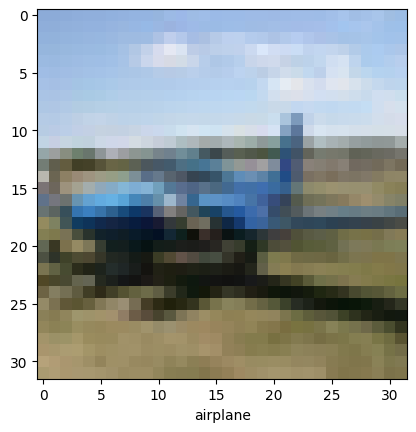

In [5]:
# Let's look at a one image
IMG_INDEX = 453  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

# CNN Architecture

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Training

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=6,
                    validation_data=(test_images, test_labels))

Epoch 1/6
1563/1563 [==============================] - 86s 54ms/step - loss: 1.5351 - accuracy: 0.4418 - val_loss: 1.3268 - val_accuracy: 0.5367
Epoch 2/6
1563/1563 [==============================] - 85s 54ms/step - loss: 1.1770 - accuracy: 0.5827 - val_loss: 1.0821 - val_accuracy: 0.6166
Epoch 3/6
1563/1563 [==============================] - 80s 51ms/step - loss: 1.0230 - accuracy: 0.6417 - val_loss: 1.0243 - val_accuracy: 0.6392
Epoch 4/6
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9262 - accuracy: 0.6752 - val_loss: 0.9889 - val_accuracy: 0.6570
Epoch 5/6
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8554 - accuracy: 0.6999 - val_loss: 0.9541 - val_accuracy: 0.6715
Epoch 6/6
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7976 - accuracy: 0.7215 - val_loss: 0.8823 - val_accuracy: 0.6990


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 6s - loss: 0.8823 - accuracy: 0.6990 - 6s/epoch - 18ms/step
0.6990000009536743


# Small Dataset

## Data augmentation

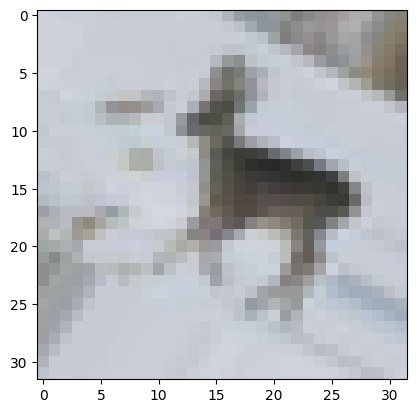

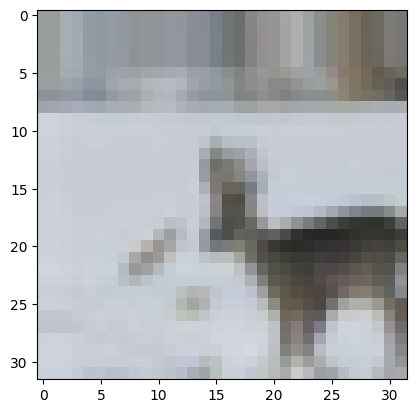

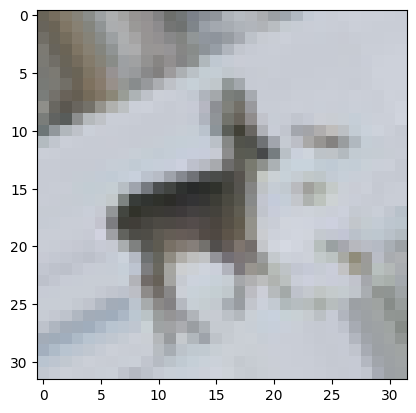

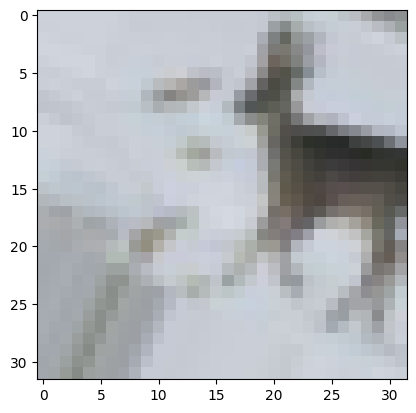

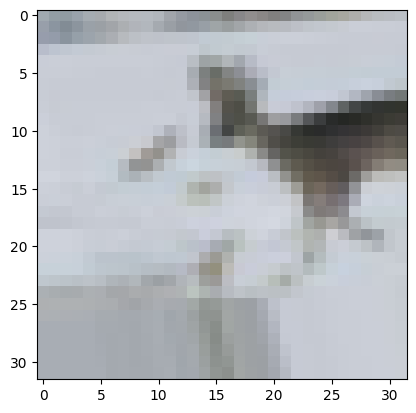

In [13]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()


# Using pretrained models


## Fine tuning a model


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

## Dataset
We will load cats_vs_dogs dataset from module tensoflow_datasets


In [18]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


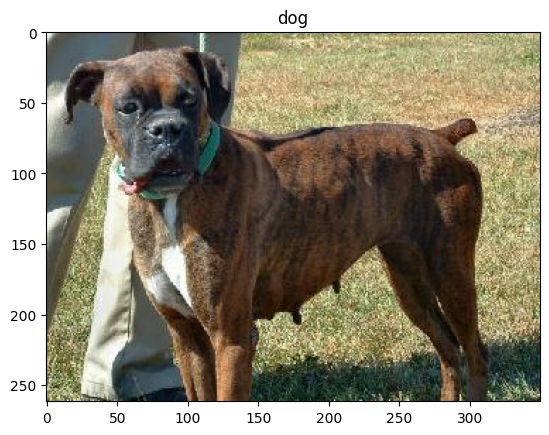

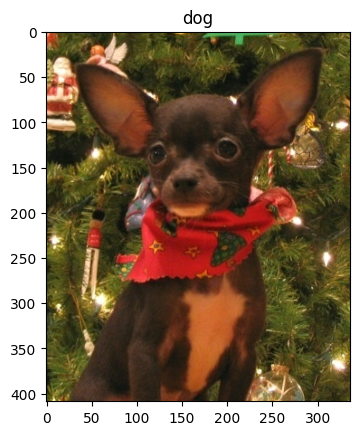

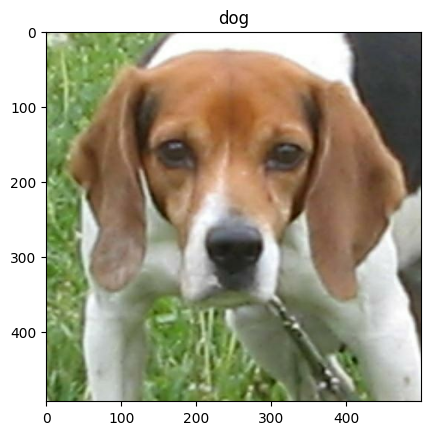

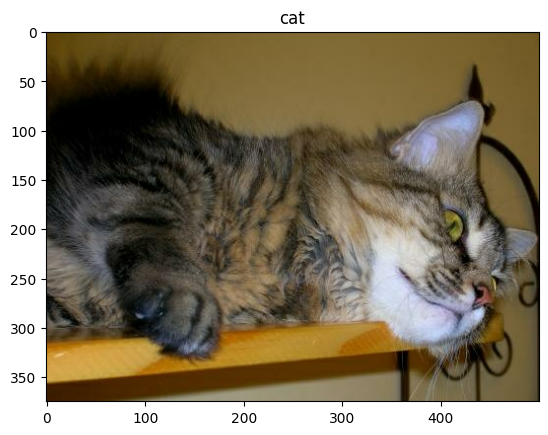

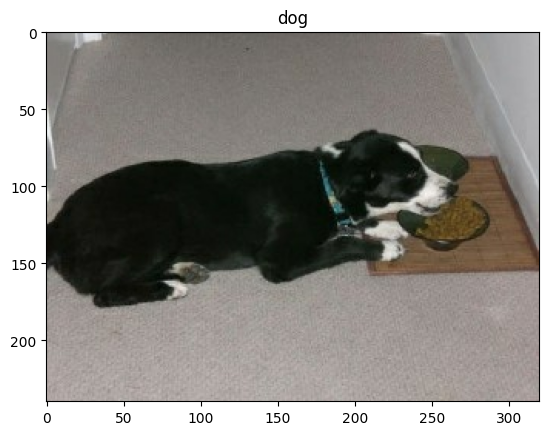

In [21]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(5):
 plt.figure()
 plt.imshow(image)
 plt.title(get_label_name(label))

## Data preprocessing

In [23]:
IMG_SIZE = 160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [31]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Checking the images after preprocesing

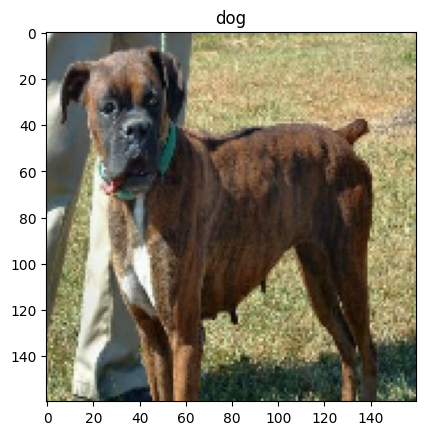

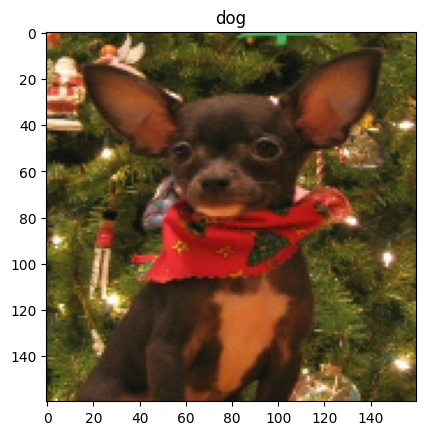

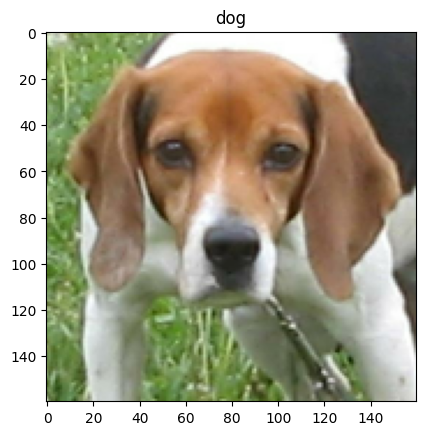

In [28]:
for image, label in train.take(3):
 plt.figure()
 image = (image + 1) / 2
 plt.imshow(image)
 plt.title(get_label_name(label))

In [29]:
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


# Shuffle the images


In [32]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

# Picking a Pretrained Model

MobileNet V2 doveloped at Google. Trained on 1.4 milion images and has 1000 different classes

In [33]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 1s 0us/step


In [34]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

at this poin this base_model, will simply output a shape (32,5,5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of different filters/features.

In [35]:
for image, _ in train_batches.take(1):
  pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


# Freezing the Base

The term freezing refers to disabling the training property of a layer. It simply means we wont make any changes to the weight of any layesr that are frozen druing trainig. This is imporat as we don't want to change the convolutinal base that already has learned weights

In [36]:
base_model.trainable = False

In [37]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

making the avarage of the 1280 diffent layers

In [39]:
global_avarage_layer = tf.keras.layers.GlobalAveragePooling2D()

Add prediction model, single one because of only two classes

In [40]:
prediction_layer = keras.layers.Dense(1)

In [41]:
model = tf.keras.Sequential([base_model,
                             global_avarage_layer,
                             prediction_layer
                             ])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [44]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
# We evaluate the model right now to see how it does before trainin in on out new images
initial_epochs = 3
validation_steps=20

loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 18s 732ms/step - loss: 0.6882 - accuracy: 0.5297


# train the model


In [48]:
# NOw we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)
acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 516s 865ms/step - loss: 0.0697 - accuracy: 0.9739 - val_loss: 0.0499 - val_accuracy: 0.9811
Epoch 2/3
582/582 [==============================] - 480s 821ms/step - loss: 0.0436 - accuracy: 0.9831 - val_loss: 0.0467 - val_accuracy: 0.9811
Epoch 3/3
582/582 [==============================] - 491s 842ms/step - loss: 0.0390 - accuracy: 0.9853 - val_loss: 0.0452 - val_accuracy: 0.9837
[0.9739387631416321, 0.9831273555755615, 0.9852767586708069]
